# Лабораторная работа 1
## Исследование данных и обучение модели

Выполнил Моисеенков Илья, М8О-408Б-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Постановка задачи

Имеется датасет с информацией о пациентах США. Нужно выявить пациентов с высоким рисков сердечного приступа.

## Анализ датасета

In [2]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.shape

(253680, 22)

### Описание датасета

**HeartDiseaseorAttack** - Таргет, был ли сердечный приступ у пациента

*HighBP* - повышенное давление

*HighChol* - повышенный холестерин

*CholCheck* - была ли проверка на холестерин за последние 5 лет

*BMI* - индекс массы тела

*Smoker* - курит ли человек

*Stroke* - был ли инсульт у человека

*Diabetes* - есть ли диабет. Если есть, то какой степени

*PhysActivity* - занимался ли человек физкультурой за последний месяц

*Fruits* - ест ли человек фрукты каждый день

*Veggies* - ест ли человек овощи каждый день

*HvyAlcoholConsump* - потребляет ли человек много алкогольных напитков

*AnyHealthcare* - имеет ли человек медицинскую страховку

*NoDocbcCost* - был ли за последний год случай, когда нужно было попасть ко врачу, но не было денег на это

*GenHlth* - субъективная оценка здоровья человека (1 = отличное, 2 = очень хорошее, 3 = хорошее, 4 = удовлетворительное, 5 = плохое)

*MentHlth* - сколько раз за последний месяц наблюдались ментальные проблемы (депрессии, стресс итд)

*PhysHlth* - сколько раз за последний месяц наблюдались проблемы после физических нагрузок (травмы)

*DiffWalk* - есть ли проблемы с ходьбой

*Sex* - пол (0 = женский, 1 = мужской)

*Age* - возрастная группа

    1 = 18-24
    2 = 25-29
    3 = 30-34
    4 = 35-39
    5 = 40-44
    6 = 45-49
    7 = 50-54
    8 = 55-59
    9 = 60-64
    10 = 65-69
    11 = 70-74
    12 = 75-79
    13 = 80+

*Education* - уровень образования

    1 = Never attended school or only kindergarten
    2 = Grades 1 through 8 (elementary)
    3 = Grades 9 through 11 (some high school)
    4 = Grade 12 or GED (high school graduate)
    5 = College 1-3 years (some college or technical school)
    6 = College 4 years or more (college graduate)

*Income* - годовой доход в долларах

    1 = <10,000
    2 = 10,000-14,999
    3 = 15,000-19,999
    4 = 20,000-24,999
    5 = 25,000-34,999
    6 = 35,000-49,999
    7 = 50,000-74,999
    8 = >75,000

In [7]:
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Пропусков в датасете нет, это хорошо.

In [8]:
numerical_features = ['MentHlth', 'PhysHlth', 'BMI']
target = 'HeartDiseaseorAttack'
categorical_features = [feat for feat in list(df.columns) if feat != target and feat not in numerical_features]

### Количественные фичи

In [9]:
df[numerical_features].describe()

,MentHlth,PhysHlth,BMI
count,253680.000000,253680.000000,253680.000000
mean,3.184772,4.242081,28.382364
std,7.412847,8.717951,6.608694
min,0.000000,0.000000,12.000000
25%,0.000000,0.000000,24.000000
50%,0.000000,0.000000,27.000000
75%,2.000000,3.000000,31.000000
max,30.000000,30.000000,98.000000


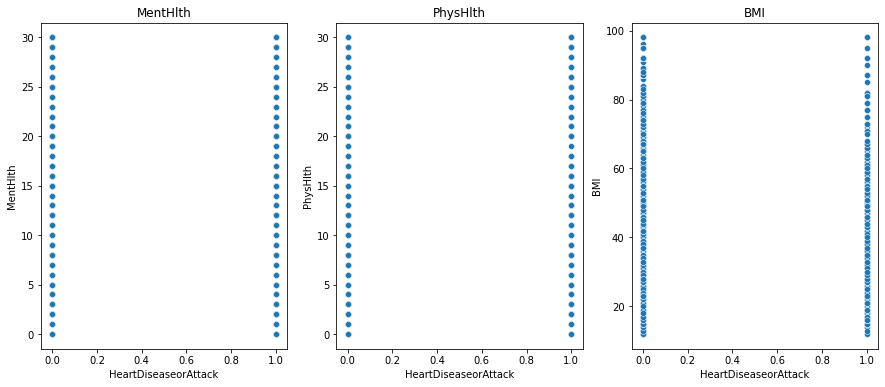

In [10]:
plt.figure(figsize=(15, 6))

for i, feat in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[target], y=df[feat])
    plt.xlabel(str(target))
    plt.title(str(feat))

plt.show()

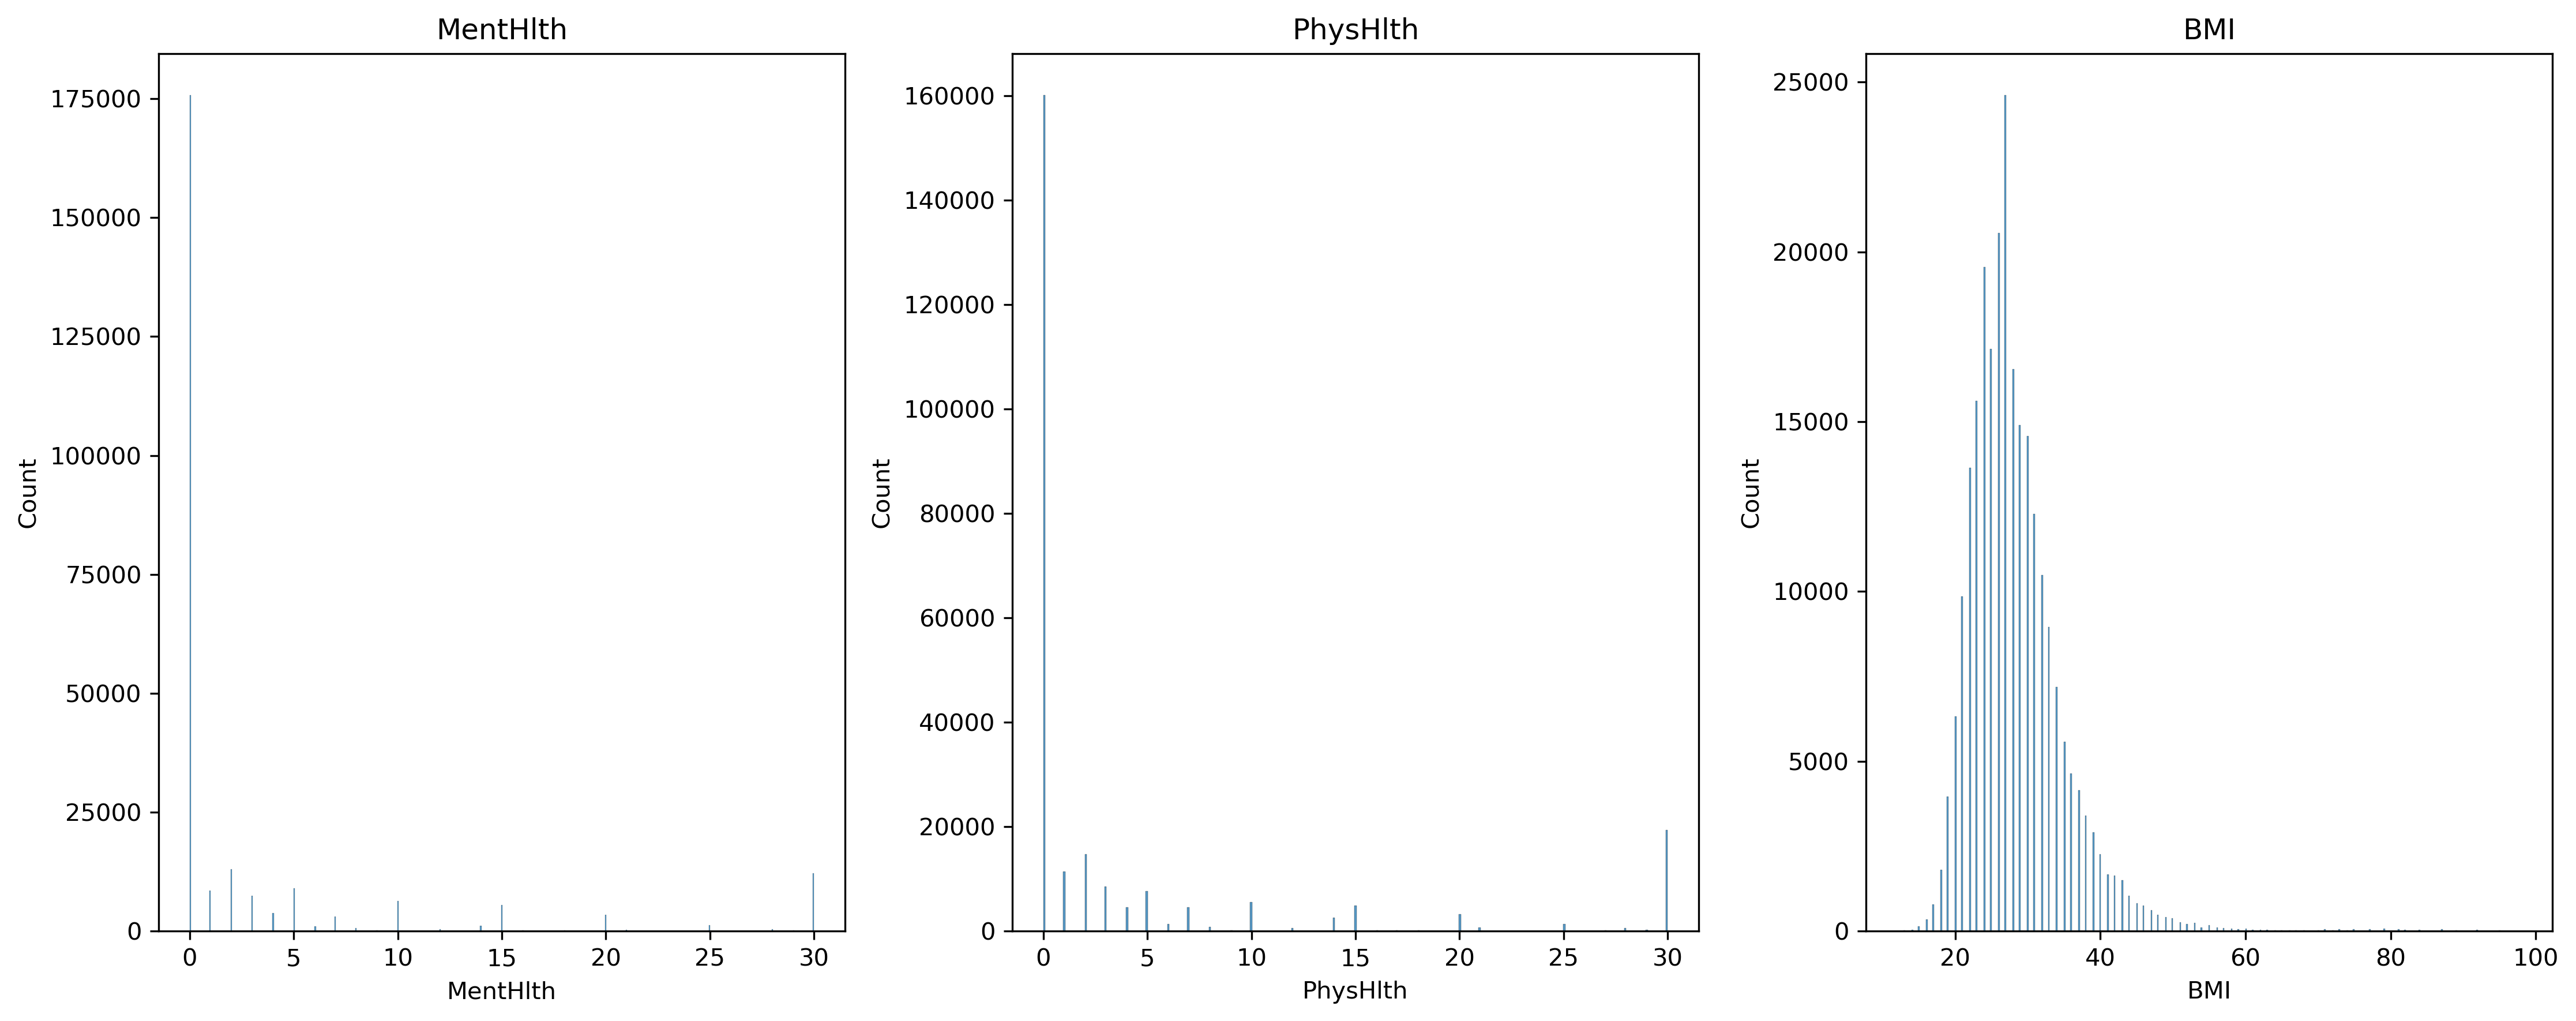

In [11]:
plt.figure(figsize=(15, 6), dpi=300)

for i, feat in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feat])
    plt.title(str(feat))
    
plt.tight_layout()
plt.show()

Видим, что 75-ый перцентиль у фичей с количеством ментальных и физических проблем равен 2 и 3 соответственно. Это значит, что только у 25% опрошенных наблюдалось большее количество проблем. Большая же часть людей сталкивалась с ними не часто.

По ИМТ видим, что здесь, наоборот, больше часть людей (примерно 70%) имеет ИМТ ниже среднего. Высокие значения индекса (больше 30) встречаются редко - примерно в 25% случаев. Это хорошо видно по точечному графику.

Распределение ИМТ похоже на нормальное.

### Категориальные фичи

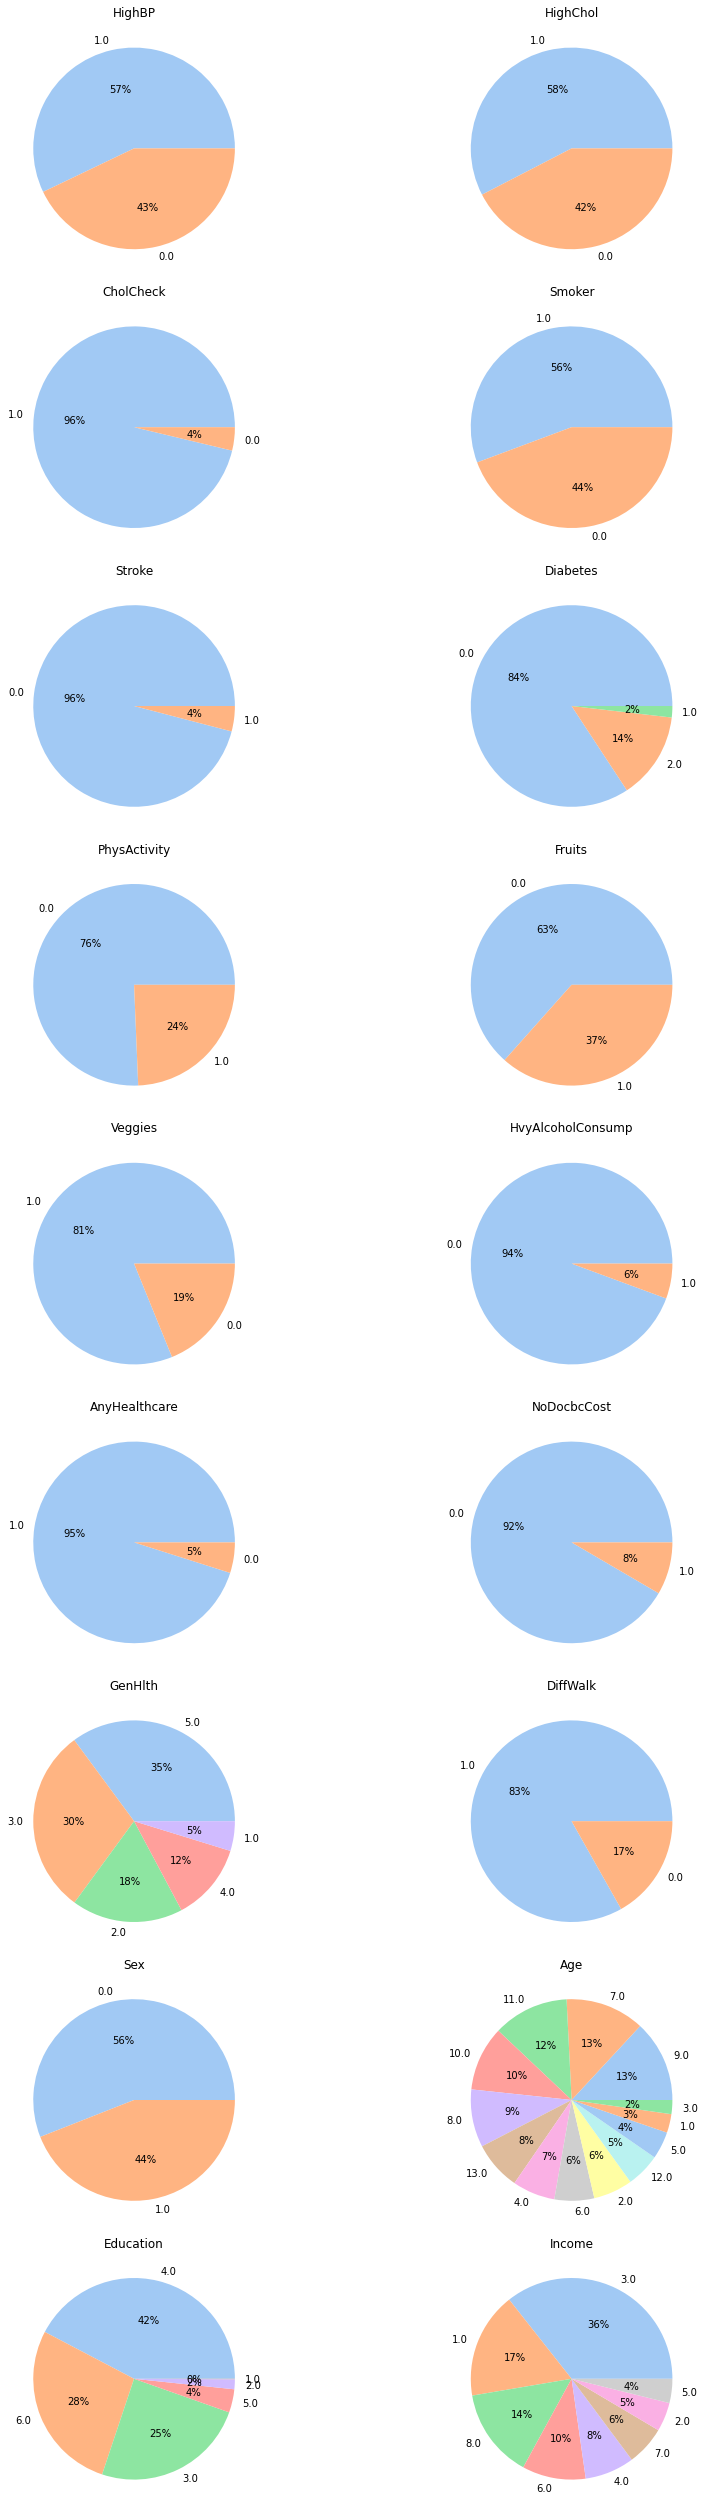

In [13]:
plt.figure(figsize=(15, 35))
colors = sns.color_palette('pastel')

for i in range(0, len(categorical_features), 2):
    plt.subplot(9, 2, i+1)
    plt.pie(x=df[categorical_features[i]].value_counts(), labels=df[categorical_features[i]].unique(), colors=colors, autopct='%.0f%%')
    plt.title(str(categorical_features[i]))
    plt.subplot(9, 2, i+2)
    plt.pie(x=df[categorical_features[i+1]].value_counts(), labels=df[categorical_features[i+1]].unique(), colors=colors, autopct='%.0f%%')
    plt.title(str(categorical_features[i+1]))

plt.tight_layout()
plt.show()

Можем заметить следующие интересные факты:
* 96% опрошенных следят за холестерином
* Люди едят овощи чаще, чем фрукты
* У большинства людей есть медицинская страховка и деньги на врача
* 48% пациентов оценивают свое состояние как хорошее или очень хорошее
* Среди опрошенных много людей с высшим образованием и с высоким доходом
* Большинство пациентов пожилые (50+ лет)

### Таргет

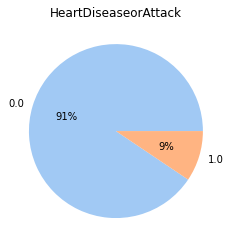

In [15]:
plt.pie(x=df[target].value_counts(), labels=df[target].unique(), colors=colors, autopct='%.0f%%')
plt.title(target)
plt.show()

Классы очень несбалансированные. Имеем соотношение 90/10. Это нужно будет учитывать в дальнейшем.

Посмотрим на корреляционную матрицу

In [17]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.00,0.21,0.18,0.04,0.05,0.11,0.20,0.18,-0.09,-0.02,-0.04,-0.03,0.02,0.03,0.26,0.06,0.18,0.21,0.09,0.22,-0.10,-0.14
HighBP,0.21,1.00,0.30,0.10,0.21,0.10,0.13,0.27,-0.13,-0.04,-0.06,-0.00,0.04,0.02,0.30,0.06,0.16,0.22,0.05,0.34,-0.14,-0.17
HighChol,0.18,0.30,1.00,0.09,0.11,0.09,0.09,0.21,-0.08,-0.04,-0.04,-0.01,0.04,0.01,0.21,0.06,0.12,0.14,0.03,0.27,-0.07,-0.09
CholCheck,0.04,0.10,0.09,1.00,0.03,-0.01,0.02,0.07,0.00,0.02,0.01,-0.02,0.12,-0.06,0.05,-0.01,0.03,0.04,-0.02,0.09,0.00,0.01
BMI,0.05,0.21,0.11,0.03,1.00,0.01,0.02,0.22,-0.15,-0.09,-0.06,-0.05,-0.02,0.06,0.24,0.09,0.12,0.20,0.04,-0.04,-0.10,-0.10
Smoker,0.11,0.10,0.09,-0.01,0.01,1.00,0.06,0.06,-0.09,-0.08,-0.03,0.10,-0.02,0.05,0.16,0.09,0.12,0.12,0.09,0.12,-0.16,-0.12
Stroke,0.20,0.13,0.09,0.02,0.02,0.06,1.00,0.11,-0.07,-0.01,-0.04,-0.02,0.01,0.03,0.18,0.07,0.15,0.18,0.00,0.13,-0.08,-0.13
Diabetes,0.18,0.27,0.21,0.07,0.22,0.06,0.11,1.00,-0.12,-0.04,-0.06,-0.06,0.02,0.04,0.30,0.07,0.18,0.22,0.03,0.19,-0.13,-0.17
PhysActivity,-0.09,-0.13,-0.08,0.00,-0.15,-0.09,-0.07,-0.12,1.00,0.14,0.15,0.01,0.04,-0.06,-0.27,-0.13,-0.22,-0.25,0.03,-0.09,0.20,0.20
Fruits,-0.02,-0.04,-0.04,0.02,-0.09,-0.08,-0.01,-0.04,0.14,1.00,0.25,-0.04,0.03,-0.04,-0.10,-0.07,-0.04,-0.05,-0.09,0.06,0.11,0.08


* Количество ментальных проблем коррелирует с количеством физических проблем и с наличием трудностей при ходьбе (о_о)
* Таргет не коррелирует с ИМТ (хотя у меня была гипотеза, что люди с высоким ИМТ более склонны к сердечным проблемам)
* Таргет коррелирует с повышенным давлением, наличием диабета и инсультов, что ожидаемо
* Количество ментальных и физических проблем имеет отрицательную корреляцию с доходом и уровнем образования. Богатые и образованные реже замечают у себя проблемы со здоровьем.
* Субъективная оценка здоровья коррелирует с наличием различных заболеваний. Чем хуже оценивает свое здоровье человек, тем более вероятно, что у него есть какие-либо заболевания. Это говорит о том, что люди оценивают свое общее состояние здоровья довольно правдиво.

Мы убедились, что целевая переменная зависит от имеющихся признаков. Следовательно, у нас есть все шансы получить хорошую модель.

## Обучение модели

Попробуем обучить случайный лес.

Для начала подготовим пайплайн обработки данных.  
Категориальные фичи преобразуем с помощью ohe. Причем если признак бинарный, то будем оставлять только один столбец для него.  Количественные фичи нормализуем. У фичи BMI распределение нормальное, поэтому приведем его к стандартному нормальному, вычтя матожидание и поделив на стандартное отклонение. Остальные количественные фичи приведем к интервалу [0; 1]

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.base import TransformerMixin

In [19]:
data_preprocessing = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='if_binary'), categorical_features),
    ('stdscale', StandardScaler(), ['BMI']),
    ('minmax', MinMaxScaler(), [feat for feat in numerical_features if feat != 'BMI'])
])

ColumnTransformer возвращает разреженную матрицу. Мы хотим сделать ее нормальной, чтобы ее можно было передавать дальше по пайплайну в модель. Поэтому напишем свой трансформер, который превращает разреженную матрицу в обычный массив.

In [20]:
class ToArrayTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

Поделим данные на трейн и тест

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(target, axis=1)
y = df[target]
assert len(X) == len(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0xDEAD)

In [30]:
X_train.shape, X_test.shape

((202944, 21), (50736, 21))

Подготавливаем модель для обучения. Помним про несбалансированность классов

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(
    steps=[
        ('preprocessing', data_preprocessing),
        ('to_array', ToArrayTransformer()),
        ('random_forest', RandomForestClassifier(class_weight='balanced'))
    ]
)

С помощью грид серча подберем оптимальное количество деревьев

In [32]:
from sklearn.model_selection import GridSearchCV

model_gs = GridSearchCV(model, {'random_forest__n_estimators': [50, 100, 200]})
model_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['HighBP',
                                                                          'HighChol',
                                                                          'CholCheck',
                                                                          'Smoker',
                                                                          'Stroke',
                                                                          'Diabetes',
                                                                          'PhysActivity',
                                                                          'Fruits',
                                                                        

In [34]:
model_gs.best_params_

{'random_forest__n_estimators': 100}

## Подсчет метрик

Будем смотреть на следующие метрики:
* Precision
* Recall
* Accuracy
* ROC AUC

Также построим следующие графики:
* PR curve
* ROC curve

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve

In [35]:
y_pred = model_gs.predict(X_test)
y_pred_probas = model_gs.predict_proba(X_test)[:, 1]

In [36]:
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('Precision = ', precision_score(y_test, y_pred))
print('Recall = ', recall_score(y_test, y_pred))
print('ROC AUC = ', roc_auc_score(y_test, y_pred_probas))

Accuracy =  0.8981196783349101
Precision =  0.38500727802037843
Recall =  0.10900473933649289
ROC AUC =  0.8109242022997428


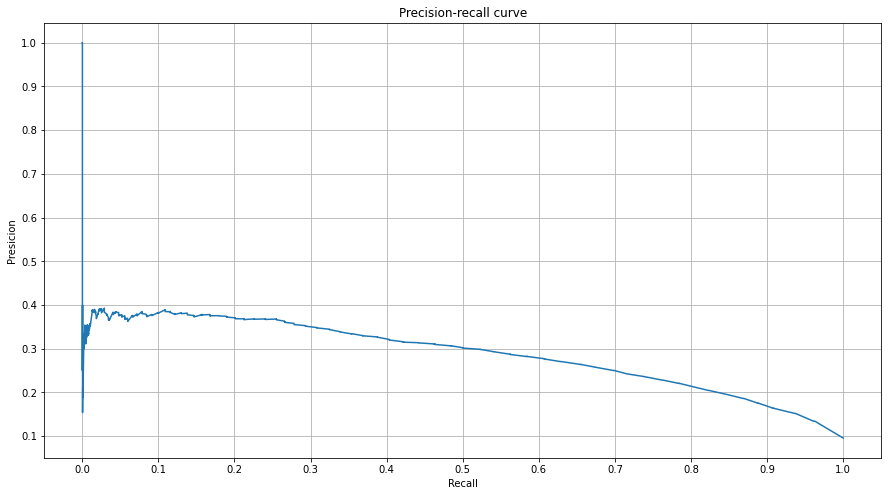

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probas)

plt.figure(figsize=(15, 8))
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.title('Precision-recall curve')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.plot(recall, precision)
plt.show()

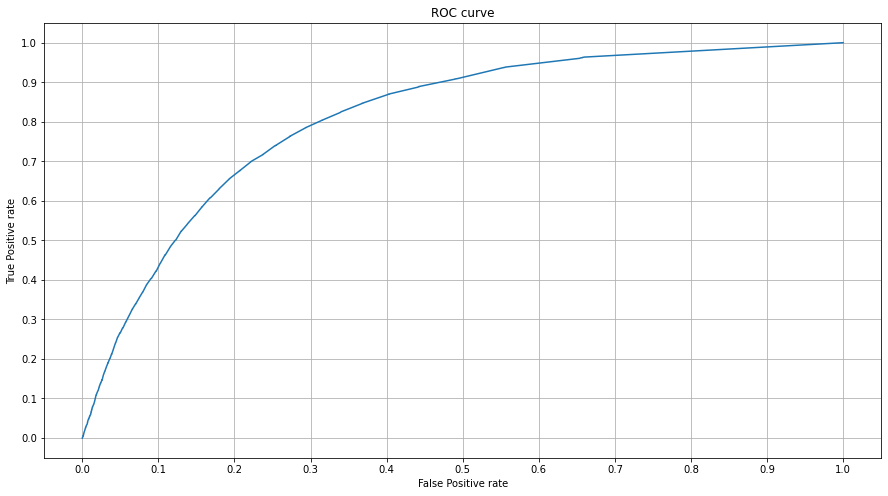

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas)

plt.figure(figsize=(15, 8))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.plot(fpr, tpr)
plt.show()

* Получили довольно высокий accuracy. Но если посмотреть на precision и recall, то можно понять, что это из-за большого числа Negative результатов (классы то дисбалансные).
* В этой задаче мы хотим иметь как можно больший recall. Наилучшее соотношение по PR кривой: precision 0.2, recall 0.8
* По ROC кривой видим, что модель все же не рандомит, а смогла найти какие-то закономерности в данных
* Я бы не сказал, что полученная модель очень хорошая. Думаю стоит попробовать градиентный бустинг (спойлер: он лучше)

## Вывод

В этой работе я попробовал решить задачу классификации. Предварительно я провел исследовательский анализ данных, чтобы получить полное представление о датасете, с которым работаю. В качестве модели я попробовал обучить случайный лес, т.к. он имеет меньшую склонность к переобучению. По полученным результатам видно, что модель чему-то да научилась. 

Однако я бы не сказал, что полученная модель идеальна. Всему виной сильный дисбаланс в данных (90/10). В качестве дальнейших шагов я бы попробовал применить модели градиентного бустинга к данному датасеты.